In [1]:
import numpy as np
#numpy for operating on the data
import pandas as pd
#pandas for organizing the data
import matplotlib.pyplot as plt
#matplotlib for visualizing the data
data=pd.read_csv('pogoda_pv.csv')
data.head(2880)

,timestamp,temperature,wind_speed,wind_dir,humidity,air_pressure,luminance,solar_radiation,uv_radiation,pm2.5,pv_voltage,pv_current,battery_voltage,battery_current,Unnamed: 14
0,21-05-2021T16:21:01,21.244,3.894,322,33.985,985.535,34382.801,198.0,10.22,1.7,73.77,2.4,47.73,3.6,NaN
1,21-05-2021T16:22:01,21.188,2.121,269,33.986,985.603,34601.801,199.2,10.29,1.0,79.49,2.2,47.73,3.6,NaN
2,21-05-2021T16:23:01,21.160,6.357,262,33.801,985.447,35530.898,204.6,10.57,1.0,79.03,2.3,50.65,3.5,NaN
3,21-05-2021T16:24:01,21.045,2.433,292,34.229,985.547,36529.301,210.3,10.93,1.0,76.62,2.5,51.13,3.7,NaN
4,21-05-2021T16:25:02,21.070,1.773,140,34.945,985.585,38342.199,220.9,11.46,0.6,74.97,2.6,51.47,3.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,23-05-2021T17:04:02,11.983,2.817,279,82.393,990.570,8874.500,51.1,2.23,2.7,81.10,0.4,54.82,0.5,NaN
2876,23-05-2021T17:05:01,11.940,1.997,259,82.829,990.619,8683.000,50.0,2.16,3.0,83.67,0.3,54.83,0.4,NaN
2877,23-05-2021T17:06:01,11.903,1.406,245,83.955,990.639,8597.500,49.5,2.13,3.2,84.49,0.3,54.77,0.4,NaN
2878,23-05-2021T17:07:01,11.898,0.776,272,83.739,990.660,8668.800,49.9,2.16,5.9,84.62,0.3,54.82,0.4,NaN


R2 score: 0.3105110049202081


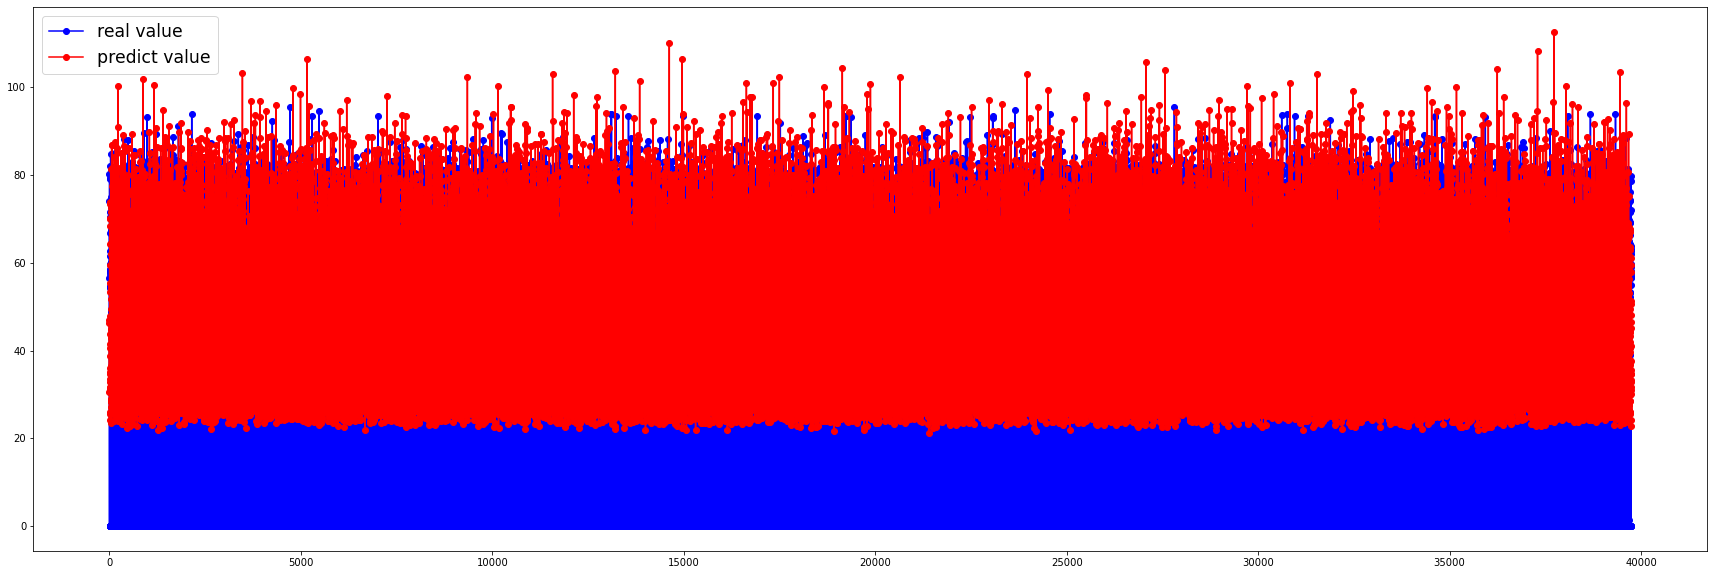

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
weather_features = ['solar_radiation', 'temperature', 'wind_speed', 'wind_dir', 'humidity', 'air_pressure']

# Set the variable X to be all our input columns
X = data[weather_features]

# set y to be our output column
Y = data.pv_voltage

# test_size default  0.25

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Standardize features by removing the mean and scaling to unit variance.
#The standard score of a sample x is calculated as:
#z = (x - u) / s
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlr_model = LinearRegression()
# fit model
mlr_model.fit(X_train, Y_train)
# predict the result
Y_pred = mlr_model.predict(X_test)

# print R2 score 
print ("R2 score: " + str(mlr_model.score(X_test, Y_test)))
plt.figure(figsize=(30, 10))
real_res, = plt.plot(np.arange(0, len(Y_test)), Y_test, 'bo-', label = 'real value')
predict_res, = plt.plot(np.arange(0, len(Y_pred)), Y_pred, 'ro-', label = 'predict value')
plt.legend(handles=[real_res, predict_res], fontsize='xx-large')
plt.show()

R2 score: 0.27947530860664116


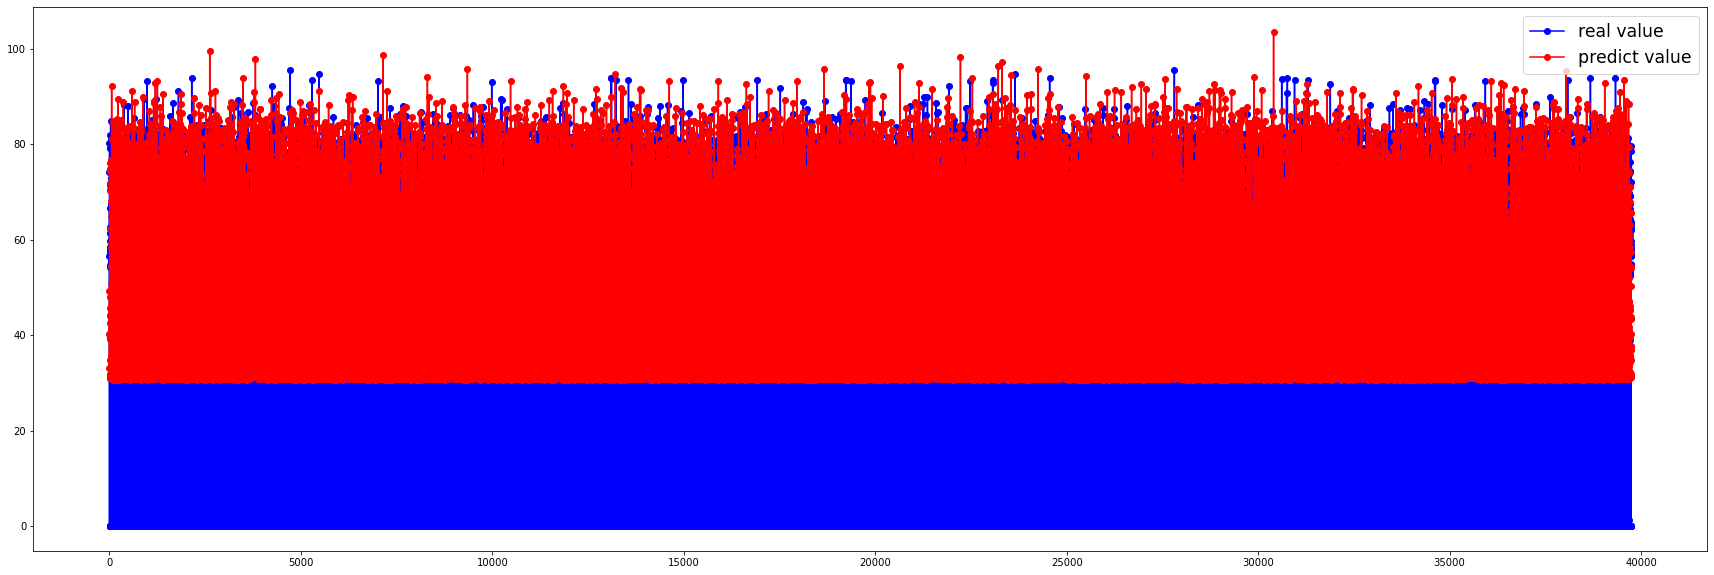

In [29]:
weather_features = ['solar_radiation', 'temperature']

# Set the variable X to be all our input columns
X = data[weather_features]

# set y to be our output column
Y = data.pv_voltage

# test_size default  0.25

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Standardize features by removing the mean and scaling to unit variance.
#The standard score of a sample x is calculated as:
#z = (x - u) / s
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlr_model = LinearRegression()
# fit model
mlr_model.fit(X_train, Y_train)
# predict the result
Y_pred = mlr_model.predict(X_test)

# print R2 score 
print ("R2 score: " + str(mlr_model.score(X_test, Y_test)))
plt.figure(figsize=(30, 10))
real_res, = plt.plot(np.arange(0, len(Y_test)), Y_test, 'bo-', label = 'real value')
predict_res, = plt.plot(np.arange(0, len(Y_pred)), Y_pred, 'ro-', label = 'predict value')
plt.legend(handles=[real_res, predict_res], fontsize='xx-large')
plt.show()


In [ ]:
#Model dont perform well, even using standart scaling. Before score was the same. More date preprocessing is need to improve model